# Линейная регрессия

## Что такое линейная регрессия?

### "Регрессия"

википедия([ссылка](https://ru.wikipedia.org/wiki/%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F_(%D0%BC%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D0%BA%D0%B0)))

> Регре́ссия (лат. regressio — обратное движение, отход) в теории вероятностей и математической статистике — односторонняя стохастическая зависимость, устанавливающая соответствие между случайными переменными[1], то есть математическое выражение, отражающее связь между зависимой переменной у и независимыми переменными х при условии, что это выражение будет иметь статистическую значимость.

статья на медиуме([ссылка](https://medium.com/nuances-of-programming/5-%D0%B2%D0%B8%D0%B4%D0%BE%D0%B2-%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%B8-%D0%B8-%D0%B8%D1%85-%D1%81%D0%B2%D0%BE%D0%B9%D1%81%D1%82%D0%B2%D0%B0-f1bb867aebcb))

> Регрессия — это метод, используемый для моделирования и анализа отношений между переменными, а также для того, чтобы увидеть, как эти переменные вместе влияют на получение определенного результата.

статья на хабре([ссылка](https://habr.com/ru/post/514818/))

> Регрессия — способ выбрать из семейства функций ту, которая минимизирует функцию потерь. Последняя характеризует насколько сильно пробная функция отклоняется от значений в заданных точках.

какое-то субъективное-интуитивное определение

> Регрессия - это метод, который пытается наилучшим образом подстроить выбранную модель под нашу генеральную совокупность исходя из имеющихся данных

## "Линейная"

уравнение прямой

\begin{aligned}
y = ax + b
\end{aligned}




In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import time

Пытаемся расположить нашу пряму на точках

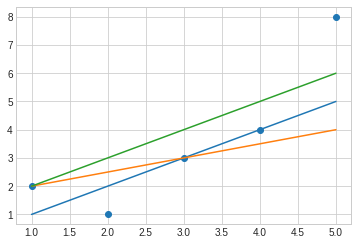

In [ ]:
fig = plt.figure()
ax = plt.axes()

x_orig = np.array([1, 2, 3, 4, 5])
y_orig = np.array([2, 1, 3, 4, 8])

plt.scatter(x_orig, y_orig)

a, b = 1, 0

y = a*x_orig+b
plt.plot(x_orig, y)

a, b = 0.5, 1.5

y = a*x_orig+b
plt.plot(x_orig, y)

a, b = 1, 1

y = a*x_orig+b
plt.plot(x_orig, y)

Хорошо бы иметь возможность оценить насколько правильно мы проводим эти прямые

## Функция ошибки

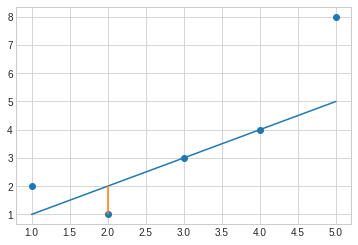

In [ ]:
fig = plt.figure()
ax = plt.axes()

x_orig = np.array([1, 2, 3, 4, 5])
y_orig = np.array([2, 1, 3, 4, 8])

plt.scatter(x_orig, y_orig)

a, b = 1, 0

y = a*x_orig+b
plt.plot(x_orig, y)

plt.plot([2,2], [1,2])

Возьмем разницу по искомой координате, но эти разницы могут быть отрицательными и положительными, поэтому уберем знак с помощью квадрата

Получаем следующую формулу:

\begin{aligned}
L = \sum_{n=0}^{N} (y - \hat{y})^2
\end{aligned}

зная функцию ошибки, мы уже можем как то характеризовать наши прямые

но хотелось бы находить самую оптимальную, то есть ту у которой минимальная функция ошибки:

\begin{aligned}
a,b = argmin(L)
\end{aligned}

самый простой способ это взять частные производные и приравнять к нулю, но мы в дальнейшем будем рассматривать градиентный спуск и поэтому рассмотрим его

## Градиентный спуск

википедия ([ссылка](https://ru.wikipedia.org/wiki/%D0%93%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA))

> Градиентный спуск — метод нахождения локального минимума или максимума функции с помощью движения вдоль градиента. Для минимизации функции в направлении градиента используются методы одномерной оптимизации, например, метод золотого сечения.

аналогия:

> спуск с горы с фонариком, у которого кончаются батарейки(останавливаемся, проверяем идет ли подъем вверх или вниз и делаем какое-то число шагов в зависимости от склона)

запишем формульно

\begin{aligned}
a = a - h \cdot dL/da \\
b = b - h \cdot dL/db \\
\end{aligned}

где, h число шагов, а dL/da и dL/db - это насколько крутой спуск перед нами находиться



### Вычисление частных производных

формулы достаточно простые для вычисления напрямую, поэтому возьмем произовдные напрямую(для более сложных формул лучше использовать граф вычислений):

\begin{aligned}
dL/da = (\sum_{n=0}^{N} (y - \hat{y})^2){'} = (\sum_{n=0}^{N} (y - ax - b)^2){'} = -2 \cdot (\sum_{n=0}^{N} (y - ax - b) \cdot x) \\
dL/db = (\sum_{n=0}^{N} (y - \hat{y})^2){'} = (\sum_{n=0}^{N} (y - ax - b)^2){'} = -2 \cdot (\sum_{n=0}^{N} (y - ax - b)) \\
\end{aligned}

a = 1.4999999866646103 b = -0.8999999518550115
loss = 6.700000000000003


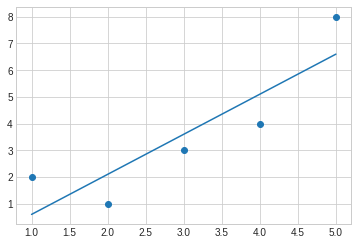

In [ ]:
a = 0
b = 0
lerning_rate = 0.01
x = x_orig
for epoch in range(1000):
    da = 0
    db = 0
    for i in range(len(x)):
        da += (y_orig[i] - a*x[i] - b) * x[i]
        db += (y_orig[i] - a*x[i] - b)
    da = -2 * da
    db = -2 * db
    a = a - lerning_rate * da
    b = b - lerning_rate * db

print("a =",a,"b =",b)
L = sum((y_orig - (a*x+b))**2)
print("loss =",L)

fig = plt.figure()
ax = plt.axes()

plt.scatter(x_orig, y_orig)

y = a*x+b
plt.plot(x, y)

## Оптимизации градиентного спуска

для сравнения алгоритмов сгенерируем некоторый датасет с ошибками



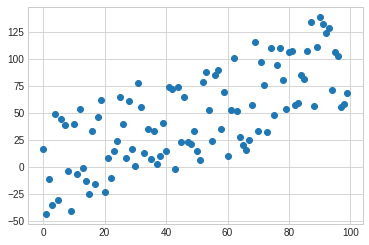

In [13]:
size = 100
x_orig = np.array([x for x in range(size)])
y_orig = x_orig + np.random.randint(-size/2, +size/2, size)

fig = plt.figure()
ax = plt.axes()

plt.scatter(x_orig, y_orig)

### Виды градиентного спуска

In [14]:
a = 0
b = 0
lerning_rate = 0.000001
x = x_orig
epoch_count = 50000

**batch** - изначальный градиентный спуск


a = 1.0508833691740644 b = -5.1169137058069
loss = 90846.01558606922
--- 33.360283613204956 seconds ---


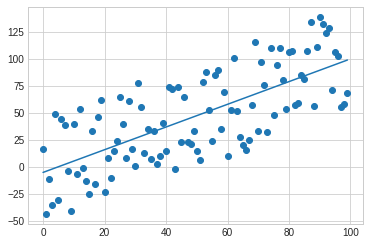

In [15]:
a = 0
b = 0
batch_loss = []

start_time = time.time()
for epoch in range(epoch_count):
    da = 0
    db = 0
    for i in range(len(x_orig)):
        da += (y_orig[i] - a*x_orig[i] - b) * x_orig[i]
        db += (y_orig[i] - a*x_orig[i] - b)
    da = -2 * da
    db = -2 * db
    a = a - lerning_rate * da
    b = b - lerning_rate * db

    if epoch % (epoch_count/100) == 0:        
        L = sum((y_orig - (a*x_orig+b))**2)
        batch_loss.append(L)
        
print("a =",a,"b =",b)
print("loss =",L)
print("--- %s seconds ---" % (time.time() - start_time))

fig = plt.figure()
ax = plt.axes()

plt.scatter(x_orig, y_orig)

y = a*x_orig+b
plt.plot(x_orig, y)

**стохастический** - вместо вычисления градиента на всем массиве берется, только один элемент

a = 0.9218526446836354 b = -0.12363986162287668
loss = 91743.36719053051
--- 0.7515020370483398 seconds ---


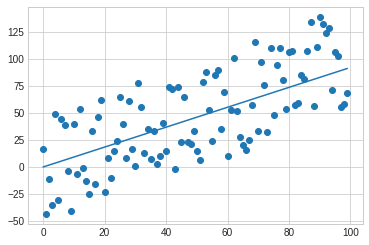

In [16]:
a = 0
b = 0
sgd = []

start_time = time.time()
for epoch in range(epoch_count):
    da = 0
    db = 0
    i = np.random.randint(0, size)
    da += (y_orig[i] - a*x_orig[i] - b) * x_orig[i]
    db += (y_orig[i] - a*x_orig[i] - b)
    da = -2 * da + 2*a
    db = -2 * db
    a = a - lerning_rate * da
    b = b - lerning_rate * db

    if epoch % (epoch_count/100) == 0:
        L = sum((y_orig - (a*x_orig+b))**2)
        sgd.append(L)

print("a =",a,"b =",b)
print("loss =",L)
print("--- %s seconds ---" % (time.time() - start_time))

fig = plt.figure()
ax = plt.axes()

plt.scatter(x_orig, y_orig)

y = a*x_orig+b
plt.plot(x_orig, y)

**mini-batch** - среднее между двумя первыми: береться часть массива

a = 0.9887363552163947 b = -1.2457956727666175 epoch =  49999
loss = 91606.2205991924
--- 3.826059103012085 seconds ---


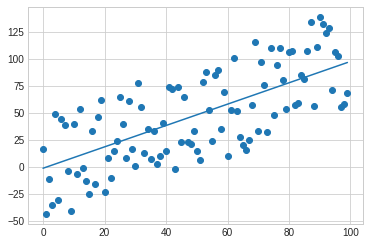

In [17]:
a = 0
b = 0
mini_batches_loss = []

#batches
batches = []
batch_count = 10
size_batch = len(x_orig)//batch_count
for i in range(batch_count):
    batches.append([i*size_batch, (i+1)*size_batch])

start_time = time.time()
for epoch in range(epoch_count):
    da = 0
    db = 0
    batch_choice = np.random.randint(0, batch_count)
    batch_min = batches[batch_choice][0]
    batch_max = batches[batch_choice][1]
    for i in range(batch_min, batch_max):
        da += (y_orig[i] - a*x_orig[i] - b) * x_orig[i]
        db += (y_orig[i] - a*x_orig[i] - b)
    da = -2 * da
    db = -2 * db
    a = a - lerning_rate * da
    b = b - lerning_rate * db

    if epoch % (epoch_count/100) == 0:
        L = sum((y_orig - (a*x_orig+b))**2)
        mini_batches_loss.append(L)

print("a =",a,"b =",b,"epoch = ", epoch)
print("loss =",L)
print("--- %s seconds ---" % (time.time() - start_time))

fig = plt.figure()
ax = plt.axes()

plt.scatter(x_orig, y_orig)

y = a*x_orig+b
plt.plot(x_orig, y)

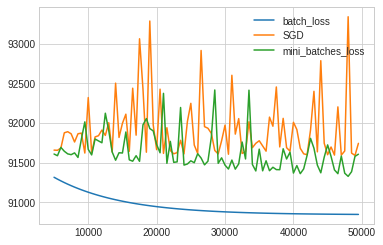

In [18]:
fig = plt.figure()
ax = plt.axes()

skip_part = 10

epoch = [x for x in range(0, epoch_count, int(epoch_count/100))]
plt.plot(epoch[skip_part:], batch_loss[skip_part:], label='batch_loss')
plt.plot(epoch[skip_part:], sgd[skip_part:], label='SGD')
plt.plot(epoch[skip_part:], mini_batches_loss[skip_part:], label='mini_batches_loss')
ax.legend()

как мы можем заметить у нас время 33 секунд для классического спуска, 3.7 для минибатча и 0.7 для стохастического, однако ошибка колеблится в обратном направлении

давайте проверим, что будет если мы будем обучать например стохасчтиескую регрессию столько же по времени сколько и обычную регрессию

a = 1.035873950068912 b = -3.9890824809342686
loss = 91739.06670166735
--- 34.49516701698303 seconds ---


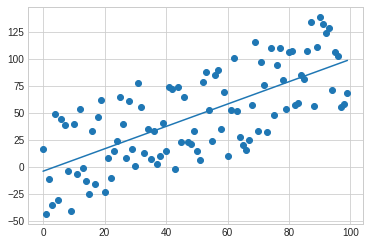

In [19]:
a = 0
b = 0
sgd_test = []

start_time = time.time()
for epoch in range(epoch_count*50):
    da = 0
    db = 0
    i = np.random.randint(0, size)
    da += (y_orig[i] - a*x_orig[i] - b) * x_orig[i]
    db += (y_orig[i] - a*x_orig[i] - b)
    da = -2 * da + 2*a
    db = -2 * db
    a = a - lerning_rate * da
    b = b - lerning_rate * db

    if epoch % (epoch_count/100) == 0:
        L = sum((y_orig - (a*x_orig+b))**2)
        sgd_test.append(L)

print("a =",a,"b =",b)
print("loss =",L)
print("--- %s seconds ---" % (time.time() - start_time))

fig = plt.figure()
ax = plt.axes()

plt.scatter(x_orig, y_orig)

y = a*x_orig+b
plt.plot(x_orig, y)

в итоге, мы получили точность не выше чем при обычной регрессии

таким образом, можно сделать вывод, что просматривать весь массив является медленным и возможно не самым оптимальным решением, но также следует брать размер вычисляемого массива соизмеримо количеству вычислительных узлов

### Регуляризация

a = 1.0508739523253092 b = -5.116458889523929
loss = 90846.9091845952
--- 33.402915954589844 seconds ---
a = 0.9804230840796779 b = -0.12172751316468602
loss = 91797.2688988218
--- 0.6841843128204346 seconds ---
a = 0.942635244179164 b = -1.2169889971470351 epoch =  49999
loss = 91322.67352376206
--- 3.783005952835083 seconds ---


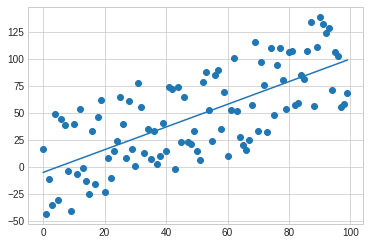

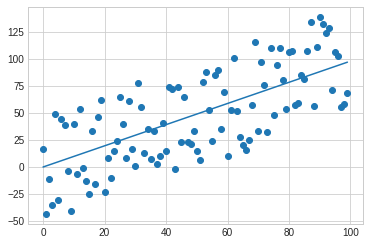

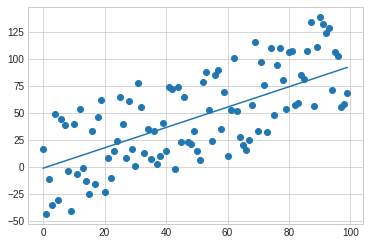

In [20]:
lamd = 0.8

a = 0
b = 0
batch_loss_reg = []

start_time = time.time()
for epoch in range(epoch_count):
    da = 0
    db = 0
    for i in range(len(x_orig)):
        da += (y_orig[i] - a*x_orig[i] - b) * x_orig[i]
        db += (y_orig[i] - a*x_orig[i] - b)
    da = -2 * da + lamd*2*a
    db = -2 * db
    a = a - lerning_rate * da
    b = b - lerning_rate * db

    if epoch % (epoch_count/100) == 0:        
        L = sum((y_orig - (a*x_orig+b))**2) + lamd*(a**2)
        batch_loss_reg.append(L)
        
print("a =",a,"b =",b)
print("loss =",L)
print("--- %s seconds ---" % (time.time() - start_time))

fig = plt.figure()
ax = plt.axes()

plt.scatter(x_orig, y_orig)

y = a*x_orig+b
plt.plot(x_orig, y)

a = 0
b = 0
sgd_reg = []

start_time = time.time()
for epoch in range(epoch_count):
    da = 0
    db = 0
    i = np.random.randint(0, size)
    da += (y_orig[i] - a*x_orig[i] - b) * x_orig[i]
    db += (y_orig[i] - a*x_orig[i] - b)
    da = -2 * da + lamd*2*a
    db = -2 * db
    a = a - lerning_rate * da
    b = b - lerning_rate * db

    if epoch % (epoch_count/100) == 0:
        L = sum((y_orig - (a*x_orig+b))**2) + lamd*(a**2)
        sgd_reg.append(L)

print("a =",a,"b =",b)
print("loss =",L)
print("--- %s seconds ---" % (time.time() - start_time))

fig = plt.figure()
ax = plt.axes()

plt.scatter(x_orig, y_orig)

y = a*x_orig+b
plt.plot(x_orig, y)

a = 0
b = 0
mini_batches_loss_reg = []

#batches
batches = []
batch_count = 10
size_batch = len(x_orig)//batch_count
for i in range(batch_count):
    batches.append([i*size_batch, (i+1)*size_batch])

start_time = time.time()
for epoch in range(epoch_count):
    da = 0
    db = 0
    batch_choice = np.random.randint(0, batch_count)
    batch_min = batches[batch_choice][0]
    batch_max = batches[batch_choice][1]
    for i in range(batch_min, batch_max):
        da += (y_orig[i] - a*x_orig[i] - b) * x_orig[i]
        db += (y_orig[i] - a*x_orig[i] - b)
    da = -2 * da + lamd*2*a
    db = -2 * db
    a = a - lerning_rate * da
    b = b - lerning_rate * db

    if epoch % (epoch_count/100) == 0:
        L = sum((y_orig - (a*x_orig+b))**2) + lamd*(a**2)
        mini_batches_loss_reg.append(L)

print("a =",a,"b =",b,"epoch = ", epoch)
print("loss =",L)
print("--- %s seconds ---" % (time.time() - start_time))

fig = plt.figure()
ax = plt.axes()

plt.scatter(x_orig, y_orig)

y = a*x_orig+b
plt.plot(x_orig, y)

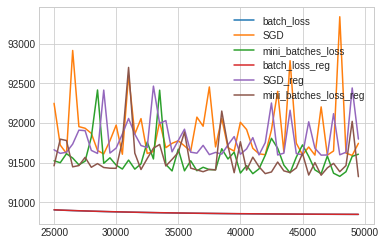

In [25]:
fig = plt.figure()
ax = plt.axes()

skip_part = 50

epoch = [x for x in range(0, epoch_count, int(epoch_count/100))]
plt.plot(epoch[skip_part:], batch_loss[skip_part:], label='batch_loss')
plt.plot(epoch[skip_part:], sgd[skip_part:], label='SGD')
plt.plot(epoch[skip_part:], mini_batches_loss[skip_part:], label='mini_batches_loss')
plt.plot(epoch[skip_part:], batch_loss_reg[skip_part:], label='batch_loss_reg')
plt.plot(epoch[skip_part:], sgd_reg[skip_part:], label='SGD_reg')
plt.plot(epoch[skip_part:], mini_batches_loss_reg[skip_part:], label='mini_batches_loss_reg')
ax.legend()

Итого: регуляризация на данном массиве не очень отличнаяет от обычной регрессии, однако это причина скорее данных чем метода

##Метрики

Mean Absolute Error (MAE)

Метрика измеряет среднюю сумму абсолютной разницы между фактическим значением и прогнозируемым значением.


\begin{aligned}
MAE = 1/n \cdot (\sum_{n=1}^{N} |original - predict|)
\end{aligned}

Mean Squared Error (MSE)

Измеряет среднюю сумму квадратной разности между фактическим значением и прогнозируемым значением для всех точек данных. Выполняется возведение во вторую степень, поэтому отрицательные значения не компенсируют положительными. А также в силу свойств этой метрики, усиливается влияние ошибок, по квадратуре от исходного значения. Это значит, что если в в исходных измерениях мы ошиблись на 1, то метрика покажет 1, 2-4, 3-9 и так далее. Чем меньше MSE, тем точнее наше предсказание. Оптимум достигается в точке 0, то есть мы идеально предсказываем.

По сравнению с средней абсолютной ошибкой, MSE  имеет некоторые преимущества:
Она подчеркивает большие ошибки над меньших ошибках.
Является дифференцируемым, что позволяет более эффективно использовать для поиска минимальных или максимальных значений с помощью математических методов.

\begin{aligned}
MSE = 1/n \cdot (\sum_{n=1}^{N} (original - predict)^2)
\end{aligned}

модификация MSE, это RMSE, отличается только корнем над всем выражением MSE


Коэффициент детерминации

Коэффициент детерминации — это доля дисперсии зависимой переменной, объясняемая рассматриваемой моделью зависимости, то есть объясняющими переменными. Более точно — это единица минус доля необъяснённой дисперсии (дисперсии случайной ошибки модели, или условной по факторам дисперсии зависимой переменной) в дисперсии зависимой переменной. Его рассматривают как универсальную меру зависимости одной случайной величины от множества других.

\begin{aligned}
R^2 = 1 - D[y|x]/D[y] = 1 - \sum_{n=1}^{N} (y - \hat{y})^2/\sum_{n=1}^{N} (y - \bar{y})^2
\end{aligned}

где в дроби сверху у нас разброс относительно предсказанных значений, а снизу относительно средних, следовательно наилучший результат, когда числитель минимален(разброс относительно наших значений), по сравнению с разбросом относительно средних, и следовательно чем ближе вся дробь к "0", тем лучше

Основная проблема применения (выборочного) R^2 заключается в том, что его значение увеличивается (не уменьшается) от добавления в модель новых переменных, даже если эти переменные никакого отношения к объясняемой переменной не имеют! Поэтому сравнение моделей с разным количеством факторов с помощью коэффициента детерминации, вообще говоря, некорректно. Для этих целей можно использовать альтернативные показатели.